# Q1).Implement a KNN model to classify the animals in to categorie.

In [1]:
#suppresses warning messages while you to run your code 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing pandas and loading data

In [4]:
import pandas as pd
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
#Performing EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [7]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [8]:
df.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [9]:
#visualizing boxplot

<AxesSubplot:>

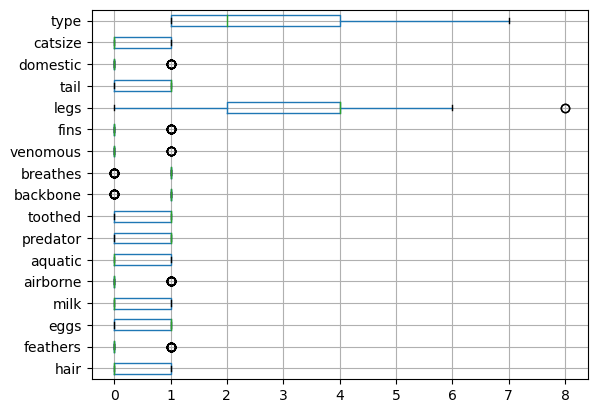

In [10]:
df.boxplot(vert=False)

In [11]:
# get the counts of unique values in the 'type' column 

In [12]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [13]:
#LabelEncoder used to convert categorical labels into numerical values.

In [14]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['animal name'] = LE.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
# splitting your DataFrame df into features (X) and the target variable (Y).

In [16]:
X = df.iloc[:,0:17]
#(or)X = df.drop('type',axis=1)
Y = df['type']

In [17]:
#split your data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((70, 17), (31, 17), (70,), (31,))

In [19]:
#applied standardization to your feature matrix X

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x = ss.fit_transform(X)
ss_x = pd.DataFrame(ss_x)
ss_x.columns = list(X)
ss_x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.586903,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.621595,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.656287,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,1.690979,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [21]:
#created a KNeighborsClassifier instance with n_neighbors=5 and p=2 (Euclidean distance),then fit the model to your training data.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2)#p-->2 for eucleidian distance
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [23]:
#obtain predictions on both the training set (X_train) and the test set (X_test)

In [24]:
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

In [25]:
#evaluate the performance of your KNN model on both the training set and the test set

In [26]:
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.5428571428571428
Test score is 0.3870967741935484


In [27]:
#evaluate the performance of a k-nearest neighbors (knn) classifier. The training and test accuracy scores are computed for each fold, and then the average scores are printed.

In [28]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9678086419753086
Test score is 0.8899999999999999


In [29]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=1)#p-->1 for manhattan distance
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7428571428571429
Test score is 0.6129032258064516


In [31]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [32]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9628395061728394
Test score is 0.9099999999999999


In [33]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.5571428571428572
Test score is 0.41935483870967744


In [35]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [36]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9281481481481482
Test score is 0.840952380952381


In [37]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,p=1)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.6428571428571429
Test score is 0.5806451612903226


In [39]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [40]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9455555555555556
Test score is 0.89


In [41]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.42857142857142855
Test score is 0.3548387096774194


In [43]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [44]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9058641975308642
Test score is 0.8304761904761904


In [45]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,p=1)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.6
Test score is 0.4838709677419355


In [47]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [48]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9256790123456791
Test score is 0.840952380952381


In [49]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.6142857142857143
Test score is 0.41935483870967744


In [51]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [52]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9603395061728394
Test score is 0.9


In [53]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,p=1)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7857142857142857
Test score is 0.6774193548387096


In [55]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [56]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.9652777777777777
Test score is 0.9099999999999999


In [57]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7142857142857143
Test score is 0.4838709677419355


In [59]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [60]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.975246913580247
Test score is 0.9199999999999999


In [61]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,p=1)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.8571428571428571
Test score is 0.8387096774193549


In [63]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [64]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.980185185185185
Test score is 0.9299999999999999


In [65]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 1.0
Test score is 0.5161290322580645


In [67]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [68]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 1.0
Test score is 0.93


In [69]:
# fits the model on the training data, makes predictions on both the training and test sets, and then prints the training and test accuracy scores.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,p=1)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 1.0
Test score is 0.7419354838709677


In [71]:
#k-fold cross-validation for evaluating the performance of the k-nearest neighbors classifier. This allows a more robust assessment by splitting the data into multiple folds and calculating average scores.

In [72]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
    x_train, x_test = ss_x.iloc[train_index], ss_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(x_train,y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 1.0
Test score is 0.95


# **As we see from the above data we conclude that by increasing n_neighbors the Accuracy Score will decrease and by using
# **Manhattan distance we are getting high Accuracy Score than Eucledian distance and by decreasing n_neighbors the Accuracy Score 
# will get increasing.
# **And also by using kfold we are getting a better improvement in every knn model.

# Q2).Prepare a model for glass classification using KNN

# Data Description:

# RI : refractive index

# Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

# Mg: Magnesium

# AI: Aluminum

# Si: Silicon

# K:Potassium

# Ca: Calcium

# Ba: Barium

# Fe: Iron

# Type: Type of glass: (class attribute)
# 1 -- building_windows_float_processed
# 2 --building_windows_non_float_processed
# 3 --vehicle_windows_float_processed
# 4 --vehicle_windows_non_float_processed (none in this database)
# 5 --containers
# 6 --tableware
# 7 --headlamps

In [73]:
#importing pandas and loading data

In [74]:
import pandas as pd
df2 = pd.read_csv('glass.csv')
df2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [75]:
#Performing EDA

In [76]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [77]:
df2.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [79]:
# get the counts of unique values in the 'type' column 

In [80]:
df2['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [81]:
# splitting your DataFrame df into features (X) and the target variable (Y).

In [82]:
X = df2.iloc[:,0:9]
Y = df2['Type']

In [83]:
#applied standardization to your feature matrix X

In [84]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_x = mm.fit_transform(X)
mm_x = pd.DataFrame(mm_x)
mm_x.columns = list(X)
mm_x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [85]:
#split your data into training and testing sets

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((149, 9), (65, 9), (149,), (65,))

In [87]:
# create an instance of the KNeighborsClassifier and  fits the KNN classifier on the training data.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5,p=2)
knc.fit(X_train,Y_train)

KNeighborsClassifier()

In [89]:
#make predictions on both the training set (X_train) and the test set (X_test).

In [90]:
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)

In [91]:
#evaluate the performance of your KNN model on both the training set and the test set

In [92]:
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7516778523489933
Test score is 0.5846153846153846


In [93]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [94]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7873997008023935
Test score is 0.3165005537098561


In [95]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.785234899328859
Test score is 0.6615384615384615


In [97]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [98]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7978988168094656
Test score is 0.3304540420819491


In [99]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=6,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.738255033557047
Test score is 0.5692307692307692


In [101]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [102]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7570039439684482
Test score is 0.27918050941306755


In [103]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=6,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7516778523489933
Test score is 0.6153846153846154


In [105]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [106]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7920848633210935
Test score is 0.3117386489479513


In [107]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=8,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7181208053691275
Test score is 0.5538461538461539


In [109]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [110]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7429892560859513
Test score is 0.2791805094130676


In [111]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=8,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7046979865771812
Test score is 0.5692307692307692


In [113]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [114]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7558479532163742
Test score is 0.28383167220376515


In [115]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.6912751677852349
Test score is 0.5846153846153846


In [117]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [118]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.703250373997008
Test score is 0.26976744186046514


In [119]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=10,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.697986577181208
Test score is 0.5846153846153846


In [121]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [122]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7359649122807017
Test score is 0.2791805094130676


In [123]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7516778523489933
Test score is 0.6


In [125]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [126]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.7908948728410172
Test score is 0.29778516057585824


In [127]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.7785234899328859
Test score is 0.6307692307692307


In [129]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [130]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.8119135046919623
Test score is 0.3165005537098561


In [131]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.8187919463087249
Test score is 0.6923076923076923


In [133]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [134]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.8411328709370325
Test score is 0.4141749723145072


In [135]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 0.8322147651006712
Test score is 0.6


In [137]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [138]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 0.8504827961376309
Test score is 0.43289036544850507


In [139]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1,p=2)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 1.0
Test score is 0.6923076923076923


In [141]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [142]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 1.0
Test score is 0.34905869324473976


In [143]:
#trained the model on a training set and evaluated its performance on both the training and test sets,calculate the accuracy of the predictions.

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1,p=1)
knc.fit(X_train,Y_train)
Y_pred_train = knc.predict(X_train)
Y_pred_test = knc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training score is',accuracy_score(Y_train,Y_pred_train))
print('Test score is',accuracy_score(Y_test,Y_pred_test))

Training score is 1.0
Test score is 0.6615384615384615


In [145]:
#assess the performance of(knc),K-fold cross-validation is a technique where the dataset is split into k subsets valuated k times, each time using a different fold as the test set and the remaining folds as the training set.

In [146]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

train_error = []
test_error = []
for train_index,test_index in kfold.split(df2):
    x_train,x_test = mm_x.iloc[train_index], mm_x.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    knc.fit(x_train,y_train)
    y_pred_train = knc.predict(x_train)
    y_pred_test = knc.predict(x_test)
    train_error.append(accuracy_score(y_train,y_pred_train))
    test_error.append(accuracy_score(y_test,y_pred_test))
    
print('Training score is',np.mean(train_error))
print('Test score is',np.mean(test_error))

Training score is 1.0
Test score is 0.3631229235880399


# For normal data the accuracy score is high for n_neighbors = 3 and p =2 and p = 1 the accuracy score is 0.83 and 
# for n_neighbors = 5 and for p = 2 the train accuracy score is 0.73 and test accuracy score is 0.65 and for p=1 the train 
# accuracuy score is 0.72 and test accuracy score is 0.65, As the n_neighbors is high and acccuracy score is low.
# And by using kfold, we are getting better results for train whereas there is no improvement in test results.